### TO DO
- check for nulls, and check distributions
- get the GAM values for assumption of linearity, for continuous variables that survived
- null values proportions
- interesting findings: redundancy between columns. Colinearity and same signals (CONT/CAT)

### 1. Get Data

In [9]:
# get data:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("insurance_t.csv")

df.head(10)


ACCTAGE  DDA   DDABAL  DEP   DEPAMT  CASHBK  CHECKS  DIRDEP  NSF  NSFAMT  \
0      0.7    1  1986.81    1   446.93       0       1       1    0    0.00   
1      4.1    0     0.00    0     0.00       0       0       0    0    0.00   
2     12.3    1  1069.78    5  6813.58       0      13       1    0    0.00   
3      0.8    1   190.03    3   880.25       0       1       0    1    5.65   
4      1.6    1   257.13    5  3408.35       0      14       0    1   60.25   
5      5.3    0     0.00    0     0.00       0       0       0    0    0.00   
6      9.0    1  1072.55    1   590.25       0       0       0    1    5.78   
7      4.0    0     0.00    0     0.00       0       0       0    0    0.00   
8      NaN    1   998.25    2  1471.81       0       4       1    0    0.00   
9      1.5    0     0.00    0     0.00       0       0       0    0    0.00   

   ...  HMOWN  LORES  HMVAL   AGE  CRSCORE  MOVED  INAREA  INS  BRANCH  RES  
0  ...    1.0    7.0   87.0  51.0    674.0      0       1    0      B2    R  
1  ...    1.0    8.5   97.0  60.0    640.0      0       1    1      B3    S  
2  ...    0.0    3.0  107.0  55.0    662.0      0       1    1      B7    U  
3  ...    0.0    4.0  107.0  40.0    642.0      0       1    0     B14    S  
4  ...    1.0    8.5   95.0  54.0    732.0      0       1    0     B15    U  
5  ...    1.0   12.5   76.0  61.0    688.0      0       1    1     B19    R  
6  ...    1.0    8.5  111.0  54.0    635.0      0       1    1     B15    R  
7  ...    1.0    3.5   99.0  46.0    642.0      0       1    1     B14    U  
8  ...    1.0    8.0  129.0  22.0    626.0      0       1    1      B1    S  
9  ...    0.0    4.0   97.0  53.0    693.0      0       0    0     B18    R  

[10 rows x 48 columns]

### 2. Check for Nulls - we will come back to this for Null Handling

In [10]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())

ACCTAGE
ACCTAGE
4.3     305
3.8     286
0.3     267
0.8     188
4.2     179
       ... 
35.9      1
38.1      1
23.4      1
50.4      1
46.6      1
Name: count, Length: 364, dtype: int64
DDA
DDA
1    6898
0    1597
Name: count, dtype: int64
DDABAL
DDABAL
0.00        1606
522.16         3
26.75          3
22.30          2
768.97         2
            ... 
250.07         1
774.94         1
609.90         1
7.81           1
46593.63       1
Name: count, Length: 6800, dtype: int64
DEP
DEP
2     2455
0     1903
3     1522
1     1089
4      717
5      487
6      175
7       70
8       50
9       12
10       7
11       5
28       1
13       1
20       1
Name: count, dtype: int64
DEPAMT
DEPAMT
0.00        1903
468.99         2
1170.28        2
150.01         2
2235.52        2
            ... 
3300.63        1
14062.24       1
272.95         1
2405.55        1
55203.58       1
Name: count, Length: 6540, dtype: int64
CASHBK
CASHBK
0    8364
1     129
2       2
Name: count, dtype: int64
CHECKS
C

In [45]:
nulls = df.isna().mean()
nulls

ACCTAGE    0.064273
DDA        0.000000
DDABAL     0.000000
DEP        0.000000
DEPAMT     0.000000
CASHBK     0.000000
CHECKS     0.000000
DIRDEP     0.000000
NSF        0.000000
NSFAMT     0.000000
PHONE      0.126545
TELLER     0.000000
SAV        0.000000
SAVBAL     0.000000
ATM        0.000000
ATMAMT     0.000000
POS        0.126545
POSAMT     0.126545
CD         0.000000
CDBAL      0.000000
IRA        0.000000
IRABAL     0.000000
LOC        0.000000
LOCBAL     0.000000
INV        0.126545
INVBAL     0.126545
ILS        0.000000
ILSBAL     0.000000
MM         0.000000
MMBAL      0.000000
MMCRED     0.000000
MTG        0.000000
MTGBAL     0.000000
CC         0.126545
CCBAL      0.126545
CCPURC     0.126545
SDB        0.000000
INCOME     0.180930
HMOWN      0.172219
LORES      0.180930
HMVAL      0.180930
AGE        0.200353
CRSCORE    0.022955
MOVED      0.000000
INAREA     0.000000
INS        0.000000
BRANCH     0.000000
RES        0.000000
dtype: float64

### 3. Look at the Shape of the Data

In [12]:
df.columns

Index(['ACCTAGE', 'DDA', 'DDABAL', 'DEP', 'DEPAMT', 'CASHBK', 'CHECKS',
       'DIRDEP', 'NSF', 'NSFAMT', 'PHONE', 'TELLER', 'SAV', 'SAVBAL', 'ATM',
       'ATMAMT', 'POS', 'POSAMT', 'CD', 'CDBAL', 'IRA', 'IRABAL', 'LOC',
       'LOCBAL', 'INV', 'INVBAL', 'ILS', 'ILSBAL', 'MM', 'MMBAL', 'MMCRED',
       'MTG', 'MTGBAL', 'CC', 'CCBAL', 'CCPURC', 'SDB', 'INCOME', 'HMOWN',
       'LORES', 'HMVAL', 'AGE', 'CRSCORE', 'MOVED', 'INAREA', 'INS', 'BRANCH',
       'RES'],
      dtype='object')

In [13]:
df.shape

(8495, 48)

In [14]:
df.describe()

ACCTAGE          DDA         DDABAL          DEP         DEPAMT  \
count  7949.000000  8495.000000    8495.000000  8495.000000    8495.000000   
mean      6.028293     0.812007    2176.968640     2.130901    2230.831261   
std       6.680347     0.390730    7652.791186     1.757638    7240.112143   
min       0.300000     0.000000    -399.530000     0.000000       0.000000   
25%       2.000000     1.000000      53.185000     1.000000     124.950000   
50%       4.000000     1.000000     563.420000     2.000000    1095.510000   
75%       7.000000     1.000000    1834.300000     3.000000    2467.580000   
max      56.300000     1.000000  259734.260000    28.000000  484893.670000   

            CASHBK       CHECKS       DIRDEP          NSF       NSFAMT  ...  \
count  8495.000000  8495.000000  8495.000000  8495.000000  8495.000000  ...   
mean      0.015656     4.245321     0.296174     0.086286     2.312651  ...   
std       0.126031     5.192671     0.456596     0.280803    13.619296  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     2.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     7.000000     1.000000     0.000000     0.000000  ...   
max       2.000000    49.000000     1.000000     1.000000   321.100000  ...   

               SDB       INCOME        HMOWN        LORES        HMVAL  \
count  8495.000000  6958.000000  7032.000000  6958.000000  6958.000000   
mean      0.109241    40.614544     0.539391     6.989437   110.902414   
std       0.311959    28.458767     0.498481     2.830281    22.641264   
min       0.000000     0.000000     0.000000     1.000000    69.000000   
25%       0.000000    20.000000     0.000000     4.500000    97.000000   
50%       0.000000    35.000000     1.000000     6.500000   107.000000   
75%       0.000000    55.000000     1.000000     9.000000   120.000000   
max       1.000000   233.000000     1.000000    18.500000   625.000000   

               AGE      CRSCORE        MOVED       INAREA          INS  
count  6793.000000  8300.000000  8495.000000  8495.000000  8495.000000  
mean     47.691005   665.586386     0.026133     0.961507     0.343496  
std      13.931635    40.075978     0.159540     0.192395     0.474903  
min      16.000000   509.000000     0.000000     0.000000     0.000000  
25%      38.000000   639.000000     0.000000     1.000000     0.000000  
50%      48.000000   666.000000     0.000000     1.000000     0.000000  
75%      57.000000   693.000000     0.000000     1.000000     1.000000  
max      94.000000   807.000000     1.000000     1.000000     1.000000  

[8 rows x 46 columns]

In [15]:
df.dtypes

ACCTAGE    float64
DDA          int64
DDABAL     float64
DEP          int64
DEPAMT     float64
CASHBK       int64
CHECKS       int64
DIRDEP       int64
NSF          int64
NSFAMT     float64
PHONE      float64
TELLER       int64
SAV          int64
SAVBAL     float64
ATM          int64
ATMAMT     float64
POS        float64
POSAMT     float64
CD           int64
CDBAL        int64
IRA          int64
IRABAL     float64
LOC          int64
LOCBAL     float64
INV        float64
INVBAL     float64
ILS          int64
ILSBAL     float64
MM           int64
MMBAL      float64
MMCRED       int64
MTG          int64
MTGBAL     float64
CC         float64
CCBAL      float64
CCPURC     float64
SDB          int64
INCOME     float64
HMOWN      float64
LORES      float64
HMVAL      float64
AGE        float64
CRSCORE    float64
MOVED        int64
INAREA       int64
INS          int64
BRANCH      object
RES         object
dtype: object

### 4. Separate into CONT/CAT vars for testing

In [16]:
ordinal = ['CASHBK', 'CC','HMOWN', 'INV', 'CCPURC', 'MMCRED']

nominal = ['BRANCH','RES']

binary = ['DDA', 'DIRDEP', 'SAV', 'ATM', 'CD', 'IRA', 'LOC', 'ILS', 'MM','MTG', 'SDB', 'MOVED', 'INAREA', 'NSF']

continuous = ['ACCTAGE', 'DDABAL', 'DEP', 'DEPAMT', 'CHECKS',
        'NSFAMT', 'PHONE', 'TELLER', 'SAVBAL','ATMAMT', 'POS', 'POSAMT', 'CDBAL', 'IRABAL',
       'LOCBAL', 'INVBAL','ILSBAL', 'MMBAL','MTGBAL', 'CCBAL', 'INCOME',
       'LORES', 'HMVAL', 'AGE', 'CRSCORE']

target = ['INS']

In [17]:
print(len(ordinal))
print(len(nominal))
print(len(binary))
print(len(continuous))
print(len(target))

6
2
14
25
1


In [18]:
# categorical variable columns. INS is the target variable, so remove it

cat_cols = ['CASHBK', 'CC','HMOWN', 'INV', 'CCPURC', 'MMCRED','BRANCH','RES',
       'DDA', 'DIRDEP', 'SAV', 'ATM', 'CD', 'IRA', 'LOC', 'ILS', 'MM',
       'MTG', 'SDB', 'MOVED', 'INAREA', 'NSF']

In [19]:
len(cat_cols)

22

### Which Variables are significant on the target?
- for continuous variables: logistic regression, 1 at a time, for relationship with cat. target
- for cat variables: chi2 test of association with target

- for multicollinearity between variables: VIF/GVIF/correlation matrix

### 4.b. Check distributions visually, and against the target variable

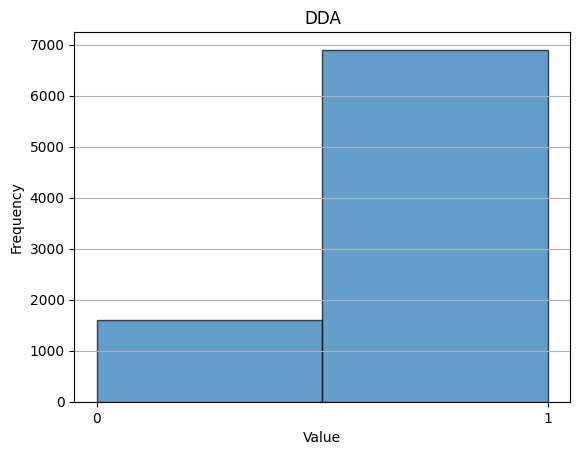

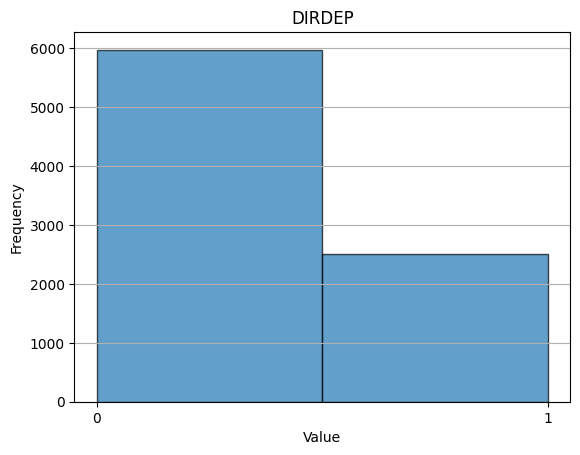

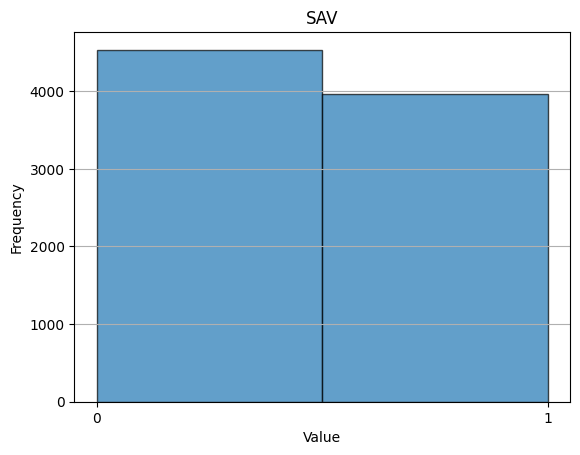

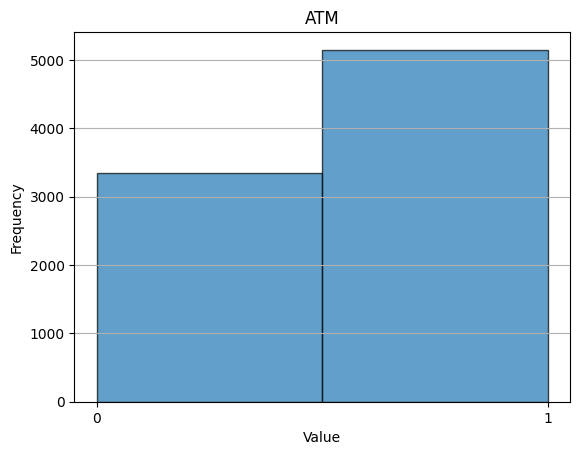

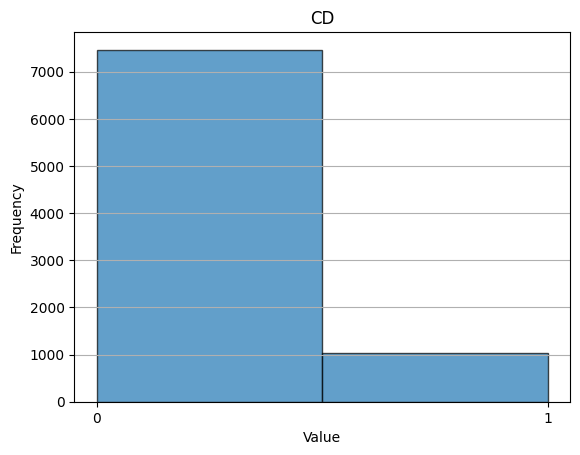

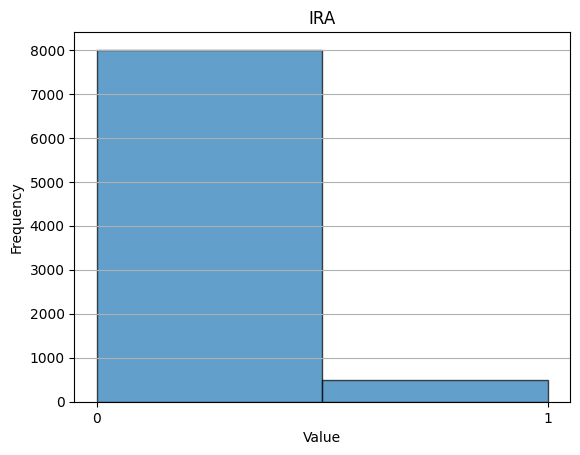

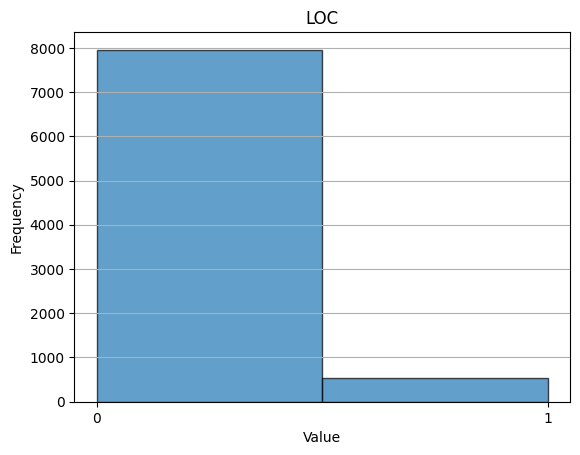

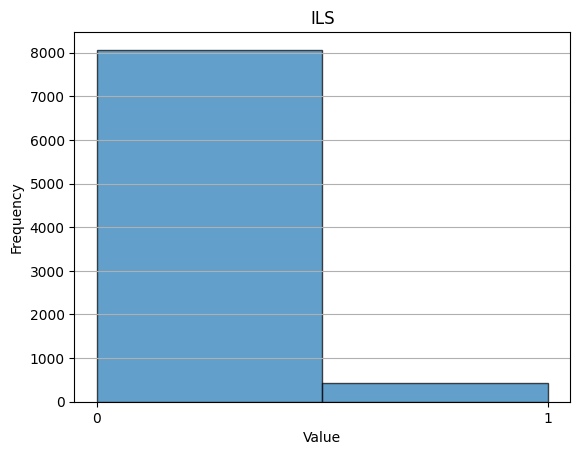

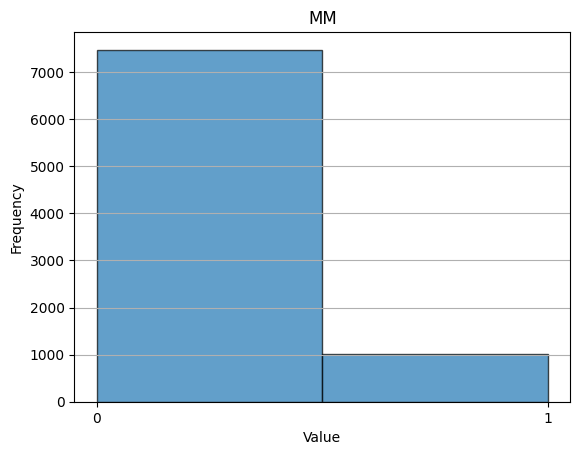

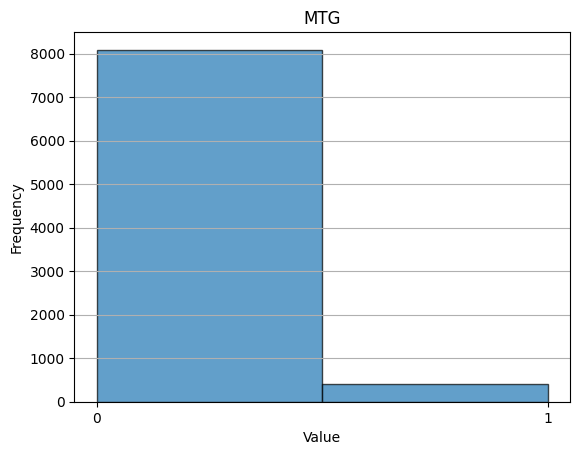

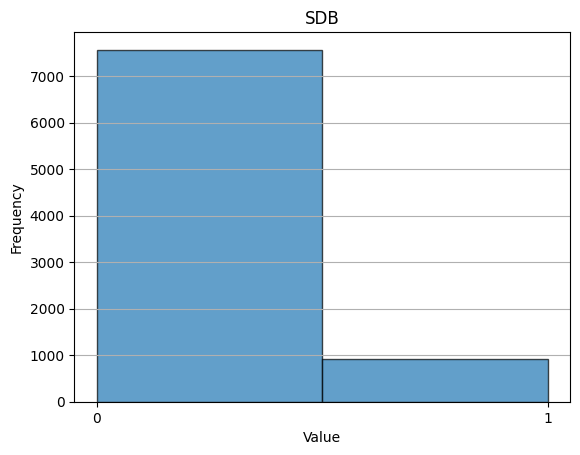

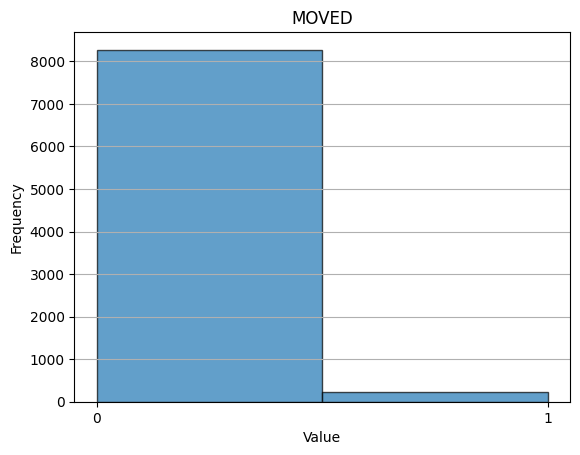

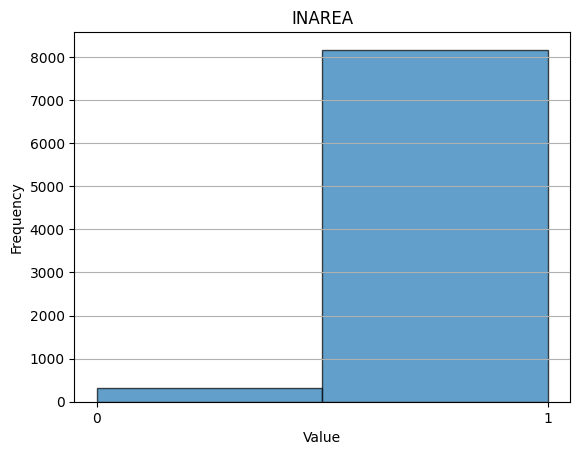

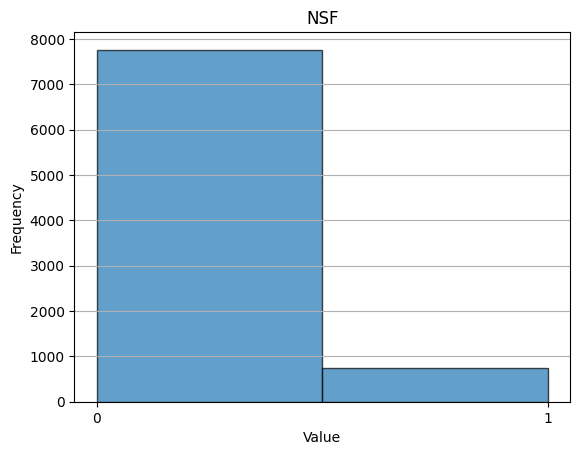

In [20]:
for col in binary:
    plt.hist(df[col], bins=2, edgecolor='black', alpha=0.7)
    plt.title('Histogram of Binary Variable')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xticks([0, 1])  # Ensure only binary values are shown on x-axis
    plt.grid(axis='y')
    plt.title(col)
    plt.show()

### 4.b. Checking for Convergence Issues - blank categories between CAT predictors and CAT target:


In [47]:
for col in cat_cols:
    print(f" Crosstab of {col} and INS")
    cont_table = pd.crosstab(columns=df[col], index=df['INS'])
    print(cont_table)

    # MMCRED (ORD), CASHBK (ORDINAL), 

 Crosstab of CASHBK and INS
CASHBK     0    1  2
INS                 
0       5473  102  2
1       2891   27  0
 Crosstab of CC and INS
CC    0.0   1.0
INS            
0    2729  2044
1    1134  1513
 Crosstab of HMOWN and INS
HMOWN   0.0   1.0
INS              
0      2136  2497
1      1103  1296
 Crosstab of INV and INS
INV   0.0  1.0
INS           
0    4689   84
1    2492  155
 Crosstab of CCPURC and INS
CCPURC   0.0  1.0  2.0  3.0  4.0
INS                             
0       4279  404   68   18    4
1       2216  352   68   10    1
 Crosstab of MMCRED and INS
MMCRED     0    1   2  3  5
INS                        
0       5409  130  33  4  1
1       2713  153  47  5  0
 Crosstab of BRANCH and INS
BRANCH   B1  B10  B11  B12  B13  B14  B15  B16  B17  B18  B19   B2   B3   B4  \
INS                                                                            
0       472   49   33   89   82  220  427  286  128  103   54  961  458  924   
1       259   33   26   51   62   51  141   94  

### 5. Testing Continuous Variables for Influence on CAT Target (INS)

In [21]:
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.generalized_linear_model import GLM

for col in continuous:
    log_model = GLM.from_formula(f'INS ~ {col}', data = df, family = Binomial()).fit()
    print({col})
    print(log_model.summary())


{'ACCTAGE'}
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 7949
Model:                            GLM   Df Residuals:                     7947
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5101.6
Date:                Tue, 27 Aug 2024   Deviance:                       10203.
Time:                        15:28:34   Pearson chi2:                 7.95e+03
No. Iterations:                     4   Pseudo R-squ. (CS):          0.0008783
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7115      0.032    -22.

In [22]:
lr_sig_dict = {}

# Loop through each numeric column and fit the model
for col in continuous:
    log_model = GLM.from_formula(f'INS ~ {col}', data=df, family=Binomial()).fit()
    
    # Extract the p-value for the predictor variable (col)
    p_value = log_model.pvalues[col]
    
    # Print the column name and its corresponding p-value
    lr_sig_dict[col] = {"p_value": p_value}

print(lr_sig_dict)


{'ACCTAGE': {'p_value': 0.00787078832394687}, 'DDABAL': {'p_value': 1.9947098887251825e-23}, 'DEP': {'p_value': 2.3121729679502417e-38}, 'DEPAMT': {'p_value': 0.0003723522229809133}, 'CHECKS': {'p_value': 1.9240751586495825e-11}, 'NSFAMT': {'p_value': 0.00013475312779105694}, 'PHONE': {'p_value': 1.4323000251061033e-19}, 'TELLER': {'p_value': 0.00930917763794665}, 'SAVBAL': {'p_value': 7.82135325950219e-48}, 'ATMAMT': {'p_value': 5.84717525700311e-08}, 'POS': {'p_value': 6.217900275378786e-07}, 'POSAMT': {'p_value': 0.11922999390407316}, 'CDBAL': {'p_value': 1.0756107997661818e-36}, 'IRABAL': {'p_value': 3.327586461351535e-11}, 'LOCBAL': {'p_value': 0.9112997583724513}, 'INVBAL': {'p_value': 0.039032059137188456}, 'ILSBAL': {'p_value': 0.03131449453426137}, 'MMBAL': {'p_value': 3.5767388358597535e-47}, 'MTGBAL': {'p_value': 0.059459155679452265}, 'CCBAL': {'p_value': 0.0032153160293424275}, 'INCOME': {'p_value': 0.25666510288698274}, 'LORES': {'p_value': 0.851265462894085}, 'HMVAL': {'

In [23]:
log_reg_surv = pd.DataFrame.from_dict(lr_sig_dict)

log_reg_surv = log_reg_surv.T

log_reg_surv = log_reg_surv[log_reg_surv.p_value < 0.002]

# log_reg_surv.sort_values(ascending = False, by = p_value)

log_reg_surv


p_value
DDABAL  1.994710e-23
DEP     2.312173e-38
DEPAMT  3.723522e-04
CHECKS  1.924075e-11
NSFAMT  1.347531e-04
PHONE   1.432300e-19
SAVBAL  7.821353e-48
ATMAMT  5.847175e-08
POS     6.217900e-07
CDBAL   1.075611e-36
IRABAL  3.327586e-11
MMBAL   3.576739e-47
HMVAL   6.663097e-12

In [24]:
len(log_reg_surv)

13

### 6. Chi2 testing the Cat Predictors for Influence on the Target (INS):

In [25]:
df_cat = df[cat_cols]

df_cat

CASHBK   CC  HMOWN  INV  CCPURC  MMCRED BRANCH RES  DDA  DIRDEP  ...  \
0          0  1.0    1.0  0.0     1.0       0     B2   R    1       1  ...   
1          0  1.0    1.0  0.0     0.0       0     B3   S    0       0  ...   
2          0  1.0    0.0  0.0     0.0       0     B7   U    1       1  ...   
3          0  NaN    0.0  NaN     NaN       0    B14   S    1       0  ...   
4          0  NaN    1.0  NaN     NaN       0    B15   U    1       0  ...   
...      ...  ...    ...  ...     ...     ...    ...  ..  ...     ...  ...   
8490       0  1.0    0.0  0.0     1.0       0     B2   R    1       0  ...   
8491       0  0.0    NaN  0.0     0.0       0     B2   S    1       1  ...   
8492       0  1.0    1.0  0.0     0.0       0     B3   U    1       1  ...   
8493       0  1.0    1.0  0.0     0.0       0     B1   S    0       0  ...   
8494       0  1.0    0.0  0.0     0.0       0     B4   U    0       0  ...   

      CD  IRA  LOC  ILS  MM  MTG  SDB  MOVED  INAREA  NSF  
0      0    0    0    0   0    0    0      0       1    0  
1      0    0    0    0   0    0    0      0       1    0  
2      0    0    0    0   0    0    0      0       1    0  
3      0    0    0    0   0    0    1      0       1    1  
4      1    0    0    0   0    0    0      0       1    1  
...   ..  ...  ...  ...  ..  ...  ...    ...     ...  ...  
8490   0    0    1    1   0    0    0      0       1    1  
8491   0    0    0    0   0    0    0      0       1    0  
8492   0    0    1    0   1    0    0      0       1    0  
8493   0    0    0    0   0    0    0      0       1    0  
8494   1    0    0    0   1    0    1      0       0    0  

[8495 rows x 22 columns]

In [26]:
df_cat.describe()

CASHBK           CC        HMOWN         INV       CCPURC  \
count  8495.000000  7420.000000  7032.000000  7420.00000  7420.000000   
mean      0.015656     0.479380     0.539391     0.03221     0.152561   
std       0.126031     0.499608     0.498481     0.17657     0.443506   
min       0.000000     0.000000     0.000000     0.00000     0.000000   
25%       0.000000     0.000000     0.000000     0.00000     0.000000   
50%       0.000000     0.000000     1.000000     0.00000     0.000000   
75%       0.000000     1.000000     1.000000     0.00000     0.000000   
max       2.000000     1.000000     1.000000     1.00000     4.000000   

            MMCRED          DDA       DIRDEP          SAV          ATM  \
count  8495.000000  8495.000000  8495.000000  8495.000000  8495.000000   
mean      0.055915     0.812007     0.296174     0.466274     0.606004   
std       0.283450     0.390730     0.456596     0.498891     0.488663   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     0.000000     0.000000   
50%       0.000000     1.000000     0.000000     0.000000     1.000000   
75%       0.000000     1.000000     1.000000     1.000000     1.000000   
max       5.000000     1.000000     1.000000     1.000000     1.000000   

                CD          IRA          LOC          ILS           MM  \
count  8495.000000  8495.000000  8495.000000  8495.000000  8495.000000   
mean      0.120895     0.057916     0.063331     0.050265     0.119953   
std       0.326024     0.233599     0.243572     0.218504     0.324926   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               MTG          SDB        MOVED       INAREA          NSF  
count  8495.000000  8495.000000  8495.000000  8495.000000  8495.000000  
mean      0.047675     0.109241     0.026133     0.961507     0.086286  
std       0.213090     0.311959     0.159540     0.192395     0.280803  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     1.000000     0.000000  
50%       0.000000     0.000000     0.000000     1.000000     0.000000  
75%       0.000000     0.000000     0.000000     1.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [27]:
# Chi2 test loop

from scipy.stats import chi2_contingency

chi2_results = {}

for col in cat_cols:
    # Perform chi-square test
    chi2_stat, p_val, dof, expected = chi2_contingency(pd.crosstab(index=df[col], columns=df['INS']), correction=True)
    
    # Store the result in the dictionary
    chi2_results[col] = {'chi2_stat': chi2_stat, 'p_value': p_val, 'dof': dof, 'expected': expected}
    
    # Print the result
    print(f"Chi2 Test Results for {col}:")
    print(f"Chi2 Statistic: {chi2_stat}, p-value: {p_val}, Degrees of Freedom: {dof}")
    print(f"Expected Frequencies: \n{expected}")
    if p_val < 0.002:
        print(f"This association is significant, p < a\n")
    else:
        print(f"This association is NOT significant, p > a\n")

Chi2 Test Results for CASHBK:
Chi2 Statistic: 11.519570630296583, p-value: 0.003151788166992581, Degrees of Freedom: 2
Expected Frequencies: 
[[5.49099800e+03 2.87300200e+03]
 [8.46889935e+01 4.43110065e+01]
 [1.31300765e+00 6.86992348e-01]]
This association is NOT significant, p > a

Chi2 Test Results for CC:
Chi2 Statistic: 139.61901681596947, p-value: 3.2249779056581864e-32, Degrees of Freedom: 1
Expected Frequencies: 
[[2484.9190027 1378.0809973]
 [2288.0809973 1268.9190027]]
This association is significant, p < a

Chi2 Test Results for HMOWN:
Chi2 Statistic: 0.005730798094836592, p-value: 0.9396561569894474, Degrees of Freedom: 1
Expected Frequencies: 
[[2133.99985779 1105.00014221]
 [2499.00014221 1293.99985779]]
This association is NOT significant, p > a

Chi2 Test Results for INV:
Chi2 Statistic: 90.32151350970622, p-value: 2.0243939322427964e-21, Degrees of Freedom: 1
Expected Frequencies: 
[[4619.26051213 2561.73948787]
 [ 153.73948787   85.26051213]]
This association is sign

In [28]:
chi2_results_df = pd.DataFrame.from_dict(chi2_results)

chi2_results = chi2_results_df.T.drop(columns=['expected'])



In [29]:
chi2_results.sort_values(by = 'p_value')

chi2_stat   p_value dof
CD      349.438969       0.0   1
DDA      311.75086       0.0   1
MM      251.400867       0.0   1
SAV     172.668946       0.0   1
IRA     160.444578       0.0   1
CC      139.619017       0.0   1
ATM     126.791155       0.0   1
INV      90.321514       0.0   1
MMCRED   75.438747       0.0   4
BRANCH  103.298226       0.0  18
CCPURC   58.593494       0.0   4
DIRDEP   43.458671       0.0   1
NSF      42.674702       0.0   1
SDB      38.518008       0.0   1
INAREA   23.913596  0.000001   1
CASHBK   11.519571  0.003152   2
ILS       6.929083  0.008481   1
RES        2.90261  0.234264   2
MOVED     1.233902   0.26665   1
LOC       0.394912  0.529729   1
MTG       0.333287   0.56373   1
HMOWN     0.005731  0.939656   1

In [30]:
chi2_results_survived = chi2_results[chi2_results.p_value <= 0.002]

chi2_results_survived

chi2_stat   p_value dof
CC      139.619017       0.0   1
INV      90.321514       0.0   1
CCPURC   58.593494       0.0   4
MMCRED   75.438747       0.0   4
BRANCH  103.298226       0.0  18
DDA      311.75086       0.0   1
DIRDEP   43.458671       0.0   1
SAV     172.668946       0.0   1
ATM     126.791155       0.0   1
CD      349.438969       0.0   1
IRA     160.444578       0.0   1
MM      251.400867       0.0   1
SDB      38.518008       0.0   1
INAREA   23.913596  0.000001   1
NSF      42.674702       0.0   1

In [31]:
len(chi2_results_survived)

15

### 7. Null Handling

In [33]:
numeric_nulls = df[continuous].isna().mean()

numeric_nulls_above_zero = numeric_nulls[numeric_nulls > 0]

numeric_nulls_above_zero.sort_values(ascending=False)

AGE        0.200353
INCOME     0.180930
LORES      0.180930
HMVAL      0.180930
PHONE      0.126545
POS        0.126545
POSAMT     0.126545
INVBAL     0.126545
CCBAL      0.126545
ACCTAGE    0.064273
CRSCORE    0.022955
dtype: float64

### Pairplot to check for multicollinearity

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df_no_nulls = df.dropna()

print(df.shape)
print(df_no_nulls.shape)

(8495, 48)
(5461, 48)


In [37]:
# need to make sure all cols in cat_cols are INT data types
for col in ordinal:
    df_no_nulls[col] = df_no_nulls[col].astype(int)
    print(df_no_nulls[col].dtype)

int64
int64
int64
int64
int64
int64


/var/folders/2g/7wbchb2s0wvgd6gwy4w7vlch0000gn/T/ipykernel_5670/4140331239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nulls[col] = df_no_nulls[col].astype(int)
/var/folders/2g/7wbchb2s0wvgd6gwy4w7vlch0000gn/T/ipykernel_5670/4140331239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nulls[col] = df_no_nulls[col].astype(int)
/var/folders/2g/7wbchb2s0wvgd6gwy4w7vlch0000gn/T/ipykernel_5670/4140331239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

### 8. Checking for Multi-collinearity

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

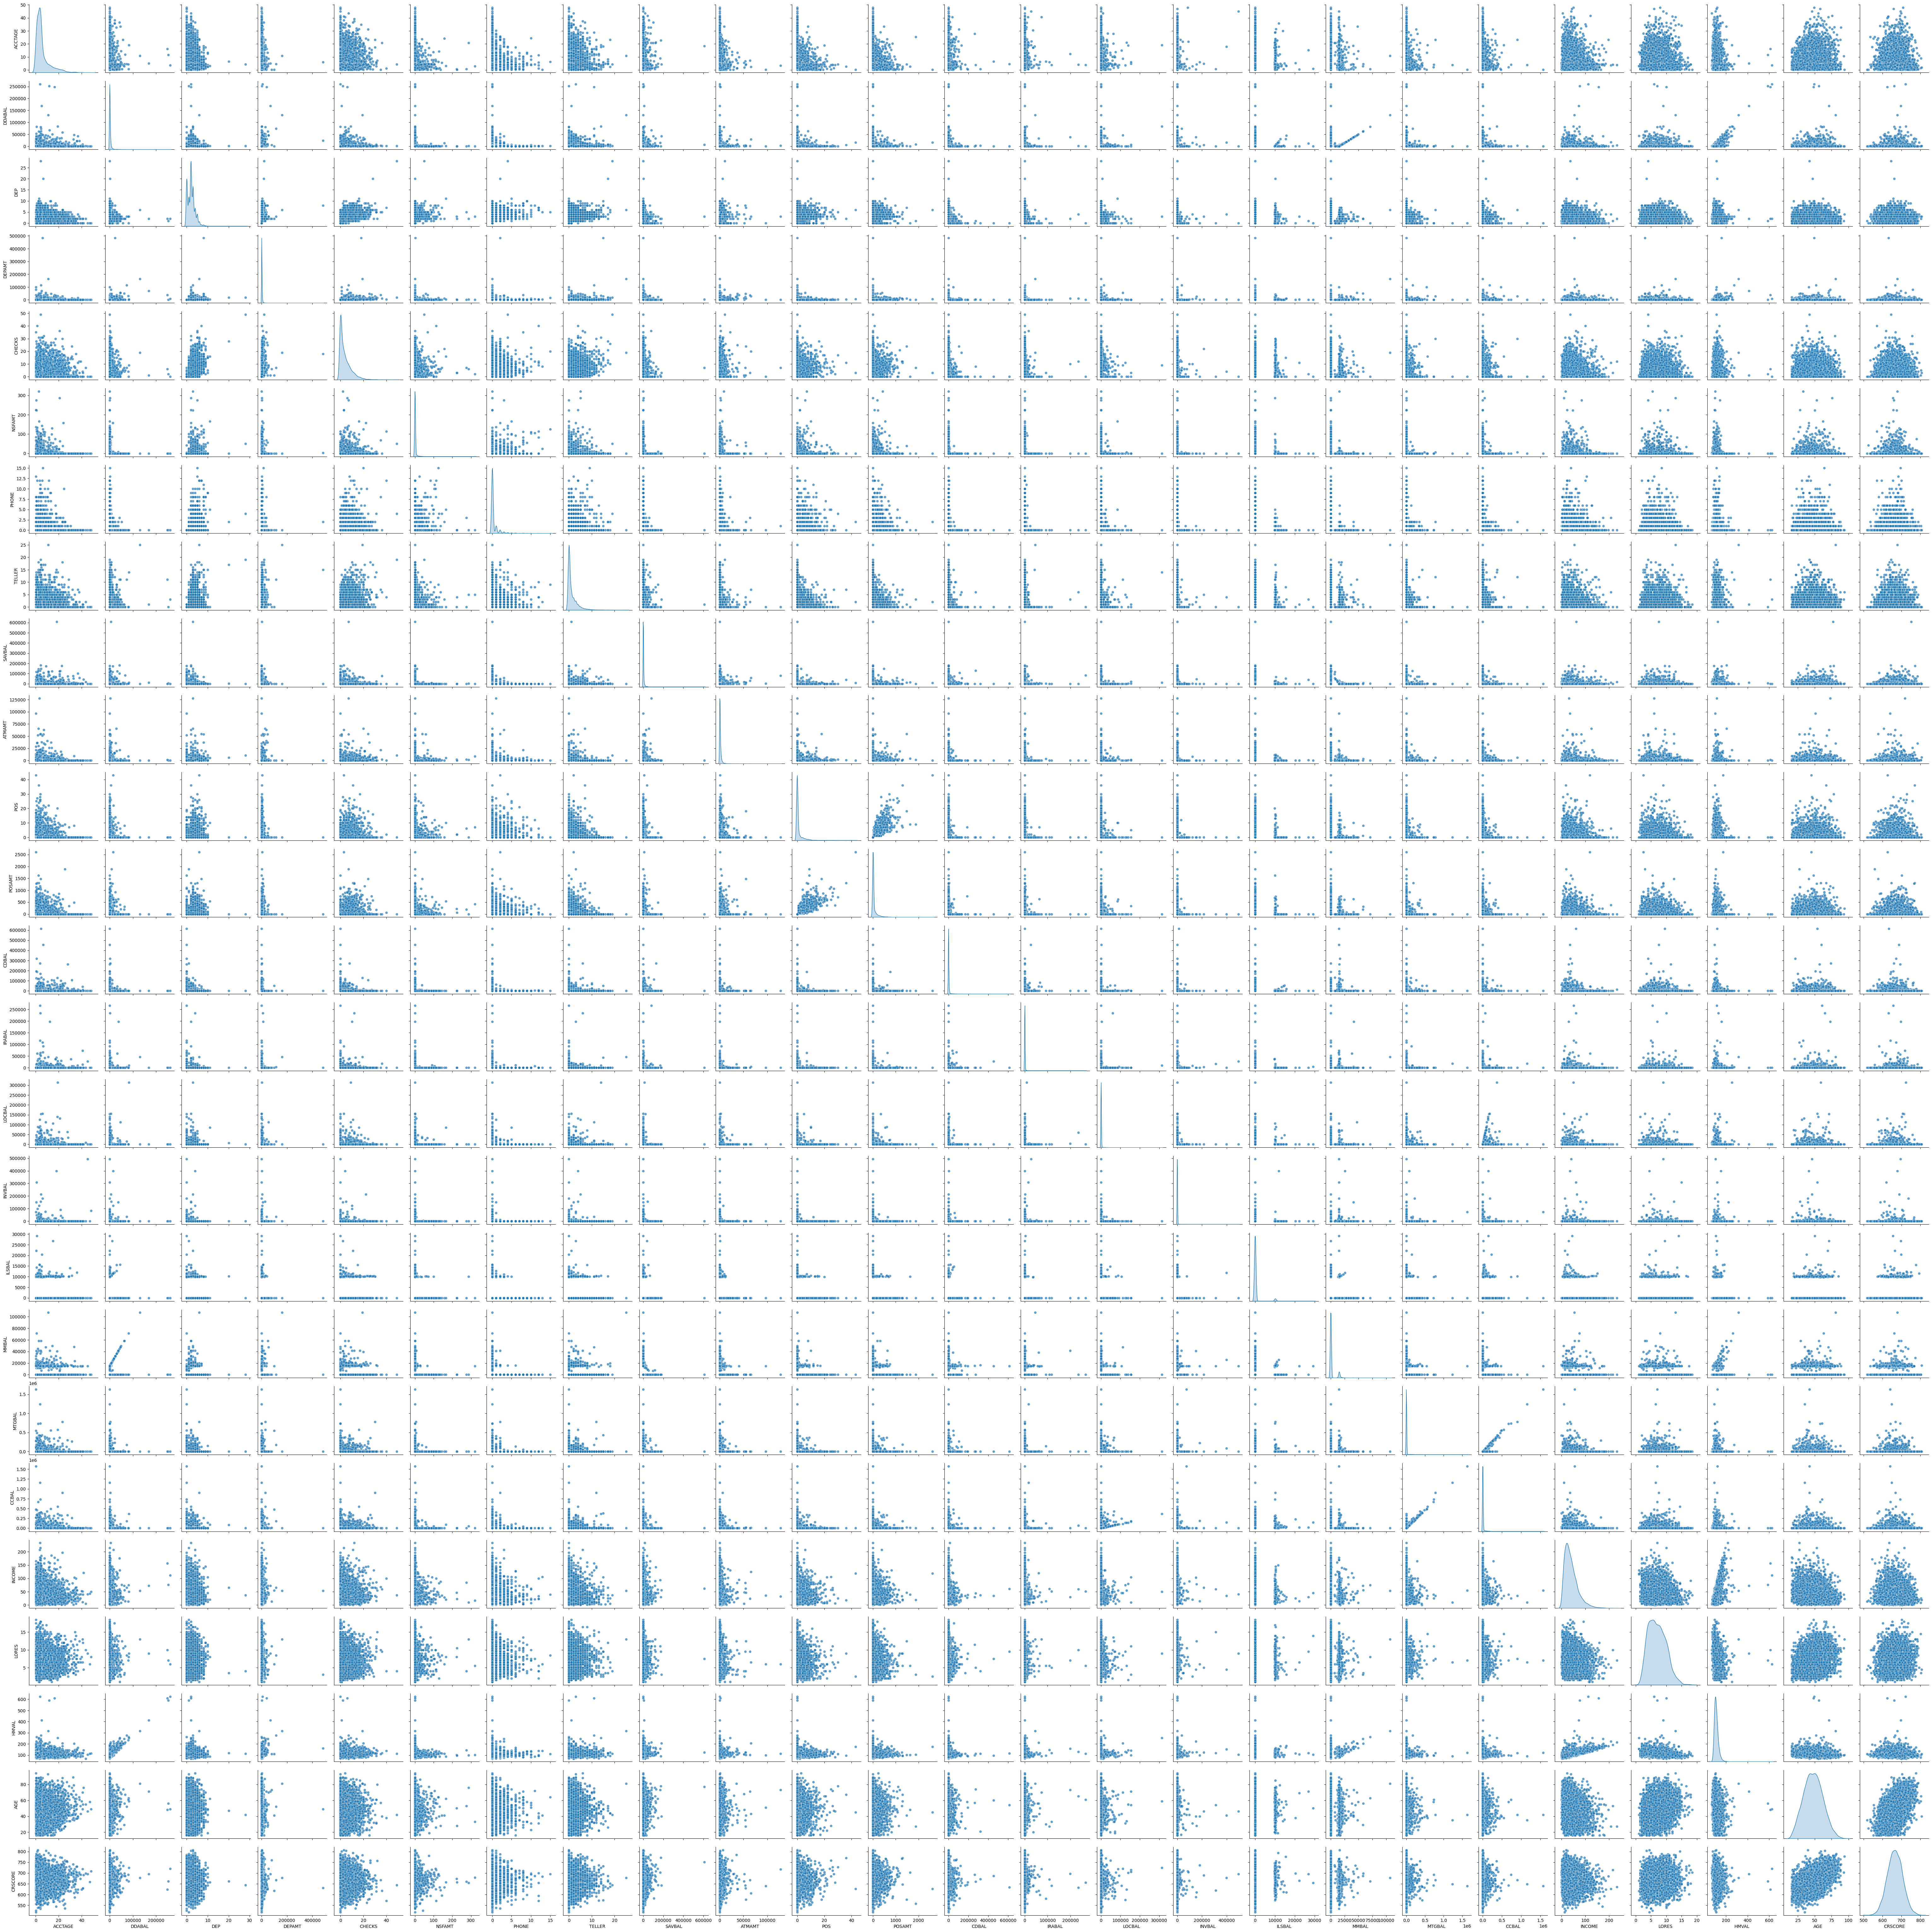

In [39]:
# Generate the pairplot with hue for categorical data
sns.pairplot(df_no_nulls[continuous], diag_kind='kde', plot_kws={'alpha': 0.7})

# Show the plot
plt.show()

In [40]:
# Calculate the correlation matrix
correlation_matrix = df[continuous].corr()


print(correlation_matrix)

          ACCTAGE    DDABAL       DEP    DEPAMT    CHECKS    NSFAMT     PHONE  \
ACCTAGE  1.000000  0.062266 -0.032331  0.022835  0.129209 -0.037035 -0.057247   
DDABAL   0.062266  1.000000  0.067339  0.277629  0.099524 -0.028130 -0.034249   
DEP     -0.032331  0.067339  1.000000  0.254344  0.633515  0.165566  0.369027   
DEPAMT   0.022835  0.277629  0.254344  1.000000  0.284646  0.035489  0.061210   
CHECKS   0.129209  0.099524  0.633515  0.284646  1.000000  0.088684  0.255708   
NSFAMT  -0.037035 -0.028130  0.165566  0.035489  0.088684  1.000000  0.242478   
PHONE   -0.057247 -0.034249  0.369027  0.061210  0.255708  0.242478  1.000000   
TELLER   0.029366  0.134009  0.392518  0.254215  0.402291  0.086151  0.148326   
SAVBAL   0.076462  0.054719 -0.060301  0.010138 -0.005453 -0.032676 -0.054321   
ATMAMT  -0.004995  0.052899  0.202176  0.206775  0.167492  0.040992  0.047773   
POS     -0.068685 -0.005990  0.305659  0.043078  0.193921  0.098090  0.245557   
POSAMT  -0.043532  0.018712 

In [41]:
correlation_dict = {}

for i in correlation_matrix.columns:
    for j in correlation_matrix.index:
        if abs(correlation_matrix.loc[i,j]) > 0.6 and i != j:
            correlation_dict[(i,j)] = correlation_matrix.loc[i,j]

print(correlation_dict)

corr_df = pd.DataFrame.from_dict(correlation_dict, orient = 'index', columns=['Correlation'])

corr_df.reset_index(inplace = True)

# Split the index tuple into separate columns
corr_df[['Var_1', 'Var_2']] = pd.DataFrame(corr_df['index'].tolist(), index=corr_df.index)

# Drop the old index column
corr_df.drop(columns=['index'], inplace=True)

corr_df.columns = ["Correlation", "Var_1", "Var_2"]

print(corr_df)

{('DDABAL', 'HMVAL'): 0.6669625974506679, ('DEP', 'CHECKS'): 0.6335151046220803, ('CHECKS', 'DEP'): 0.6335151046220803, ('POS', 'POSAMT'): 0.8475264650122473, ('POSAMT', 'POS'): 0.8475264650122473, ('MTGBAL', 'CCBAL'): 0.9514733731581598, ('CCBAL', 'MTGBAL'): 0.9514733731581598, ('INCOME', 'HMVAL'): 0.6831157208235243, ('HMVAL', 'DDABAL'): 0.6669625974506679, ('HMVAL', 'INCOME'): 0.6831157208235243}
   Correlation   Var_1   Var_2
0     0.666963  DDABAL   HMVAL
1     0.633515     DEP  CHECKS
2     0.633515  CHECKS     DEP
3     0.847526     POS  POSAMT
4     0.847526  POSAMT     POS
5     0.951473  MTGBAL   CCBAL
6     0.951473   CCBAL  MTGBAL
7     0.683116  INCOME   HMVAL
8     0.666963   HMVAL  DDABAL
9     0.683116   HMVAL  INCOME


### 9. Check CONT Variables for Linearity with the LOGIT (required assumption for CONT Vars)

In [42]:
import statsmodels.api as sm

from statsmodels.gam.api import GLMGam, BSplines

Column: ACCTAGE
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                     5457
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3536.9
Date:                Tue, 27 Aug 2024   Deviance:                       7073.7
Time:                        15:31:16   Pearson chi2:                 5.46e+03
No. Iterations:                     5   Pseudo R-squ. (CS):           0.002421
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6339      0.059    

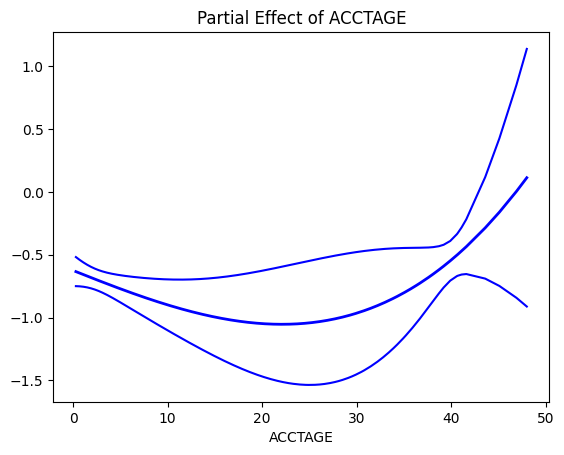

Column: DDABAL
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                      NaN
Model Family:                Binomial   Df Model:                          NaN
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3467.2
Date:                Tue, 27 Aug 2024   Deviance:                       6934.4
Time:                        15:31:16   Pearson chi2:                 5.46e+03
No. Iterations:                    12   Pseudo R-squ. (CS):            0.02754
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6275      0.099     

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:257: RuntimeWarning: divide by zero encountered in divide
  return (2 * p - 1) / v ** 2
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:575: RuntimeWarning: invalid value encountered in multiply
  tmp = score_factor * tmp


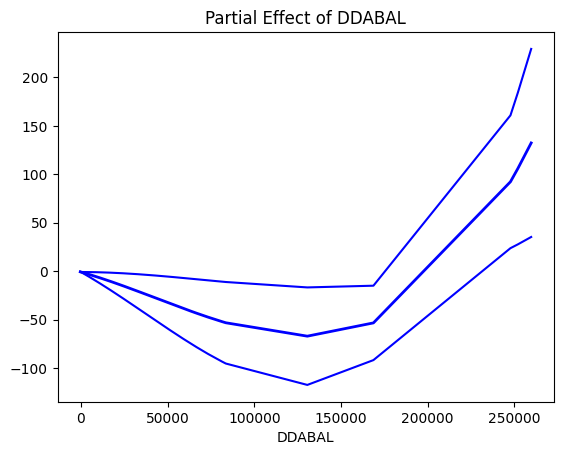

Column: DEP
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                  5457.00
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3468.2
Date:                Tue, 27 Aug 2024   Deviance:                       6936.5
Time:                        15:31:16   Pearson chi2:                 5.46e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.02717
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0565      0.053     -1.

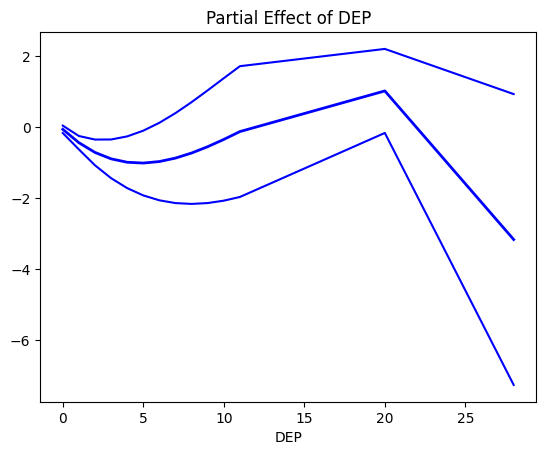

Column: DEPAMT
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                  5457.00
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3531.8
Date:                Tue, 27 Aug 2024   Deviance:                       7063.5
Time:                        15:31:17   Pearson chi2:                 5.46e+03
No. Iterations:                    11   Pseudo R-squ. (CS):           0.004276
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6607      0.036    -

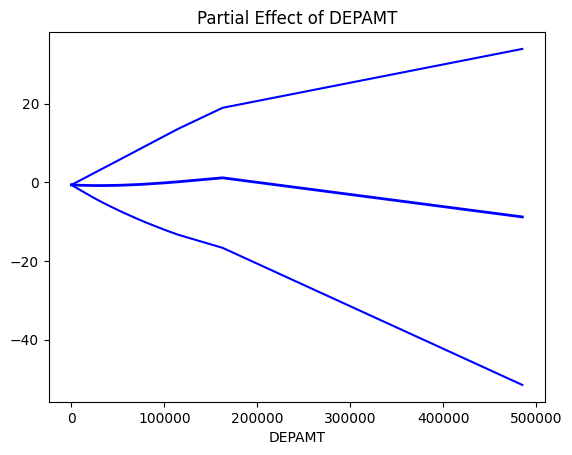

Column: CHECKS
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                     5457
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3528.9
Date:                Tue, 27 Aug 2024   Deviance:                       7057.8
Time:                        15:31:17   Pearson chi2:                 5.46e+03
No. Iterations:                     6   Pseudo R-squ. (CS):           0.005317
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4353      0.043    -

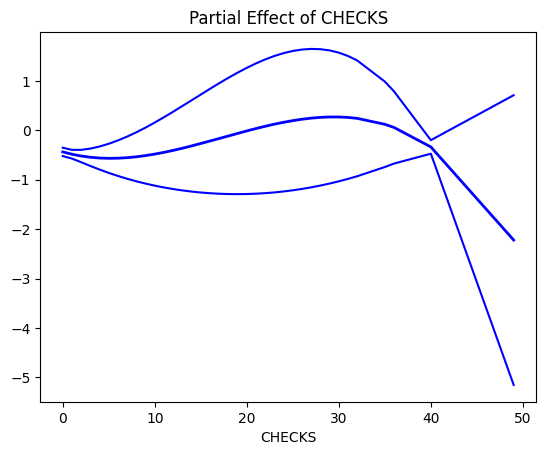

Column: NSFAMT
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                     5457
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3530.1
Date:                Tue, 27 Aug 2024   Deviance:                       7060.3
Time:                        15:31:17   Pearson chi2:                 5.46e+03
No. Iterations:                     5   Pseudo R-squ. (CS):           0.004875
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5737      0.029    -

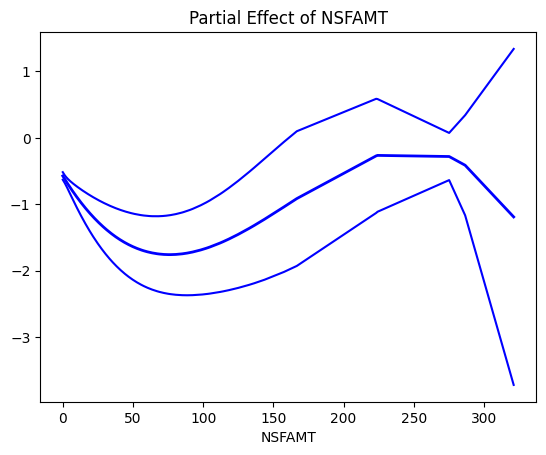

Column: PHONE
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:         -745143302141.89
Model Family:                Binomial   Df Model:              745143307601.89
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3496.5
Date:                Tue, 27 Aug 2024   Deviance:                       6993.0
Time:                        15:31:18   Pearson chi2:                 5.44e+03
No. Iterations:                   432   Pseudo R-squ. (CS):            0.01705
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5013      0.032    -1

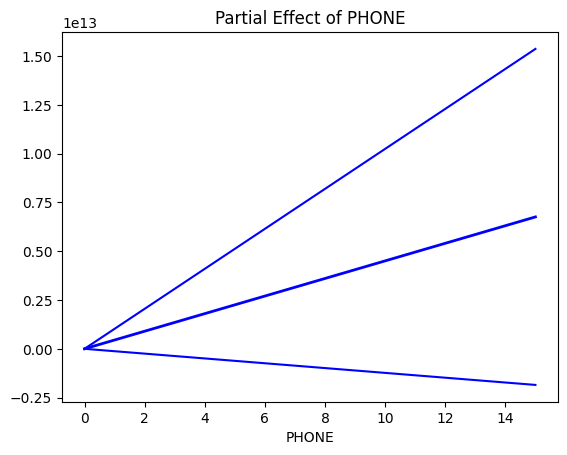

Column: TELLER
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:         3430333431316.82
Model Family:                Binomial   Df Model:            -3430333425856.82
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3535.1
Date:                Tue, 27 Aug 2024   Deviance:                       7070.1
Time:                        15:31:18   Pearson chi2:                 5.47e+03
No. Iterations:                    41   Pseudo R-squ. (CS):           0.003078
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6340      0.039    -

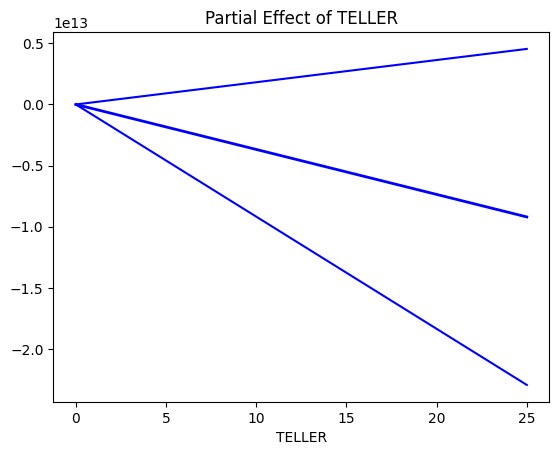

Column: SAVBAL
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                  5457.00
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3335.4
Date:                Tue, 27 Aug 2024   Deviance:                       6670.8
Time:                        15:31:18   Pearson chi2:                 5.72e+03
No. Iterations:                     7   Pseudo R-squ. (CS):            0.07337
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8614      0.032    -

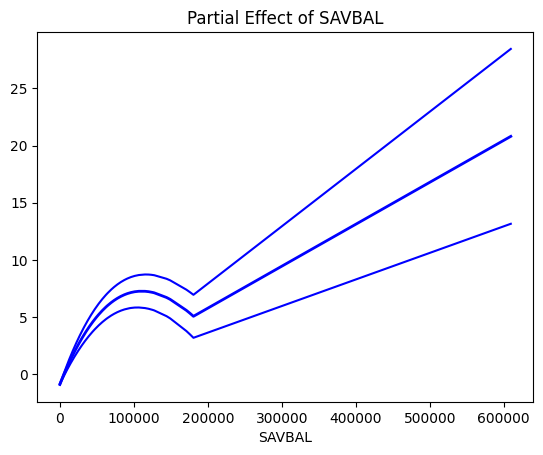

Column: ATMAMT
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                     5457
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3518.1
Date:                Tue, 27 Aug 2024   Deviance:                       7036.2
Time:                        15:31:18   Pearson chi2:                 5.47e+03
No. Iterations:                     6   Pseudo R-squ. (CS):           0.009249
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6900      0.033    -

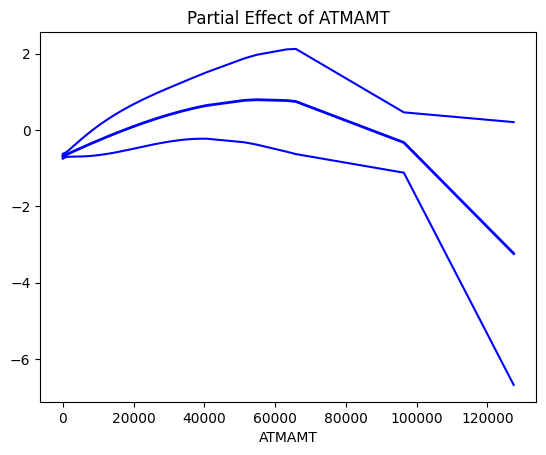

Column: POS
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:          543126775502.12
Model Family:                Binomial   Df Model:             -543126770042.12
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3518.6
Date:                Tue, 27 Aug 2024   Deviance:                       7037.1
Time:                        15:31:19   Pearson chi2:                 5.46e+03
No. Iterations:                    18   Pseudo R-squ. (CS):           0.009081
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5270      0.033    -16.

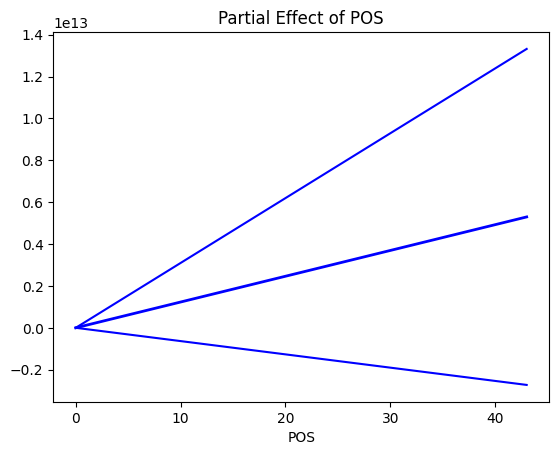

Column: POSAMT
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                  5457.00
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3528.1
Date:                Tue, 27 Aug 2024   Deviance:                       7056.3
Time:                        15:31:19   Pearson chi2:                 5.46e+03
No. Iterations:                     5   Pseudo R-squ. (CS):           0.005603
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5469      0.031    -

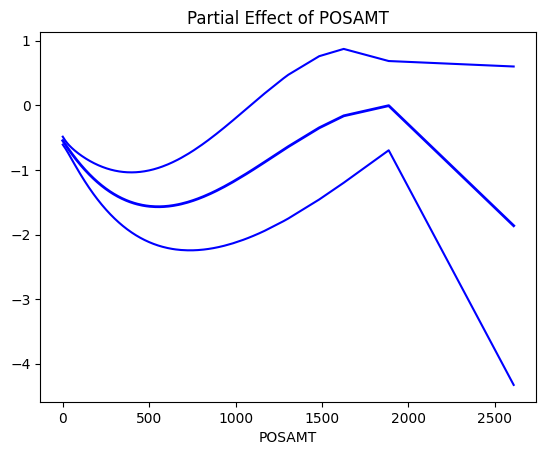

Column: CDBAL
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                      NaN
Model Family:                Binomial   Df Model:                          NaN
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3418.0
Date:                Tue, 27 Aug 2024   Deviance:                       6835.9
Time:                        15:31:19   Pearson chi2:                 5.45e+03
No. Iterations:                    16   Pseudo R-squ. (CS):            0.04493
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7595      0.031    -2

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:257: RuntimeWarning: divide by zero encountered in divide
  return (2 * p - 1) / v ** 2
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:575: RuntimeWarning: invalid value encountered in multiply
  tmp = score_factor * tmp


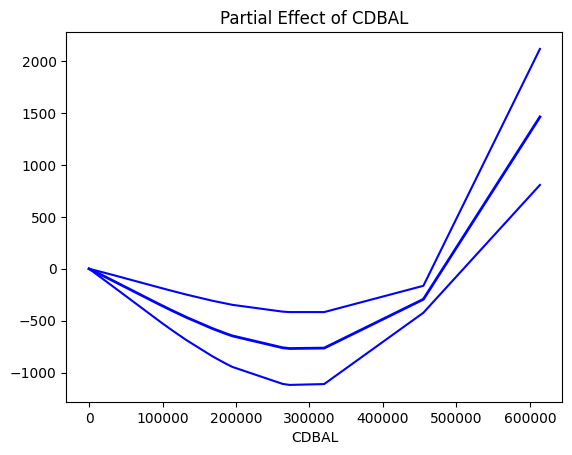

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:257: RuntimeWarning: divide by zero encountered in divide
  return (2 * p - 1) / v ** 2
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:575: RuntimeWarning: invalid value encountered in multiply
  tmp = score_factor * tmp


Column: IRABAL
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                      NaN
Model Family:                Binomial   Df Model:                          NaN
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3504.0
Date:                Tue, 27 Aug 2024   Deviance:                       7008.0
Time:                        15:31:19   Pearson chi2:                 5.46e+03
No. Iterations:                    11   Pseudo R-squ. (CS):            0.01435
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6528      0.029    -

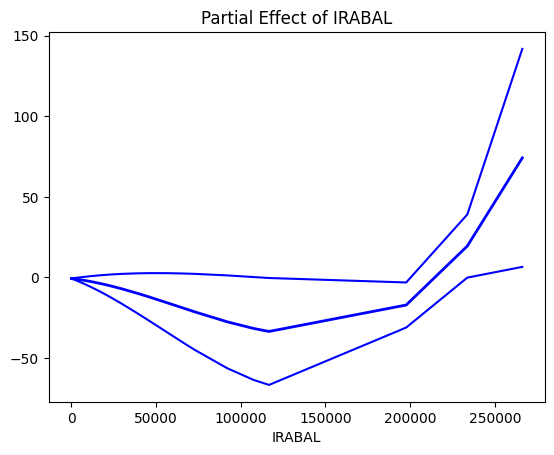

Column: LOCBAL
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                     5457
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3542.2
Date:                Tue, 27 Aug 2024   Deviance:                       7084.4
Time:                        15:31:19   Pearson chi2:                 5.46e+03
No. Iterations:                     9   Pseudo R-squ. (CS):          0.0004612
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6122      0.029    -

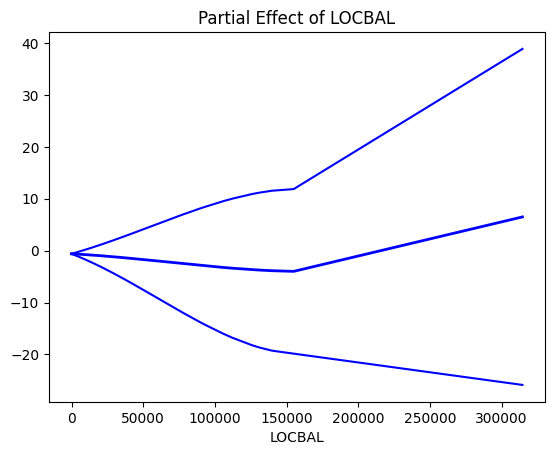

Column: INVBAL
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                  5457.00
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3536.8
Date:                Tue, 27 Aug 2024   Deviance:                       7073.6
Time:                        15:31:19   Pearson chi2:                 5.46e+03
No. Iterations:                     6   Pseudo R-squ. (CS):           0.002436
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6190      0.028    -

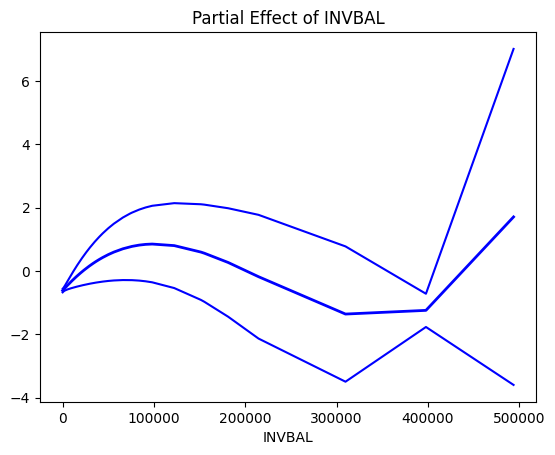

Column: ILSBAL
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                  5457.00
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3540.5
Date:                Tue, 27 Aug 2024   Deviance:                       7081.0
Time:                        15:31:19   Pearson chi2:                 5.46e+03
No. Iterations:                     5   Pseudo R-squ. (CS):           0.001081
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6045      0.029    -

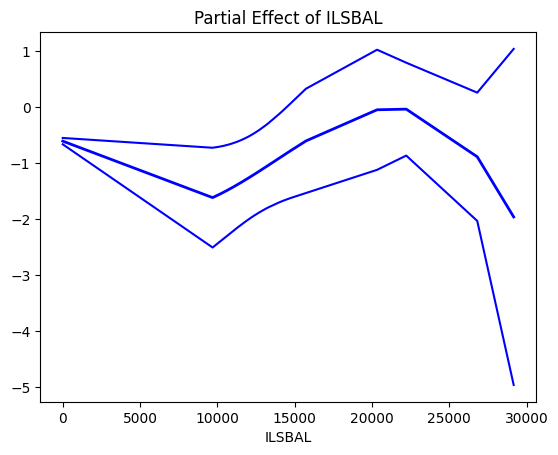

Column: MMBAL
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                  5457.00
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3452.1
Date:                Tue, 27 Aug 2024   Deviance:                       6904.2
Time:                        15:31:20   Pearson chi2:                 5.46e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.03291
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7535      0.031    -2

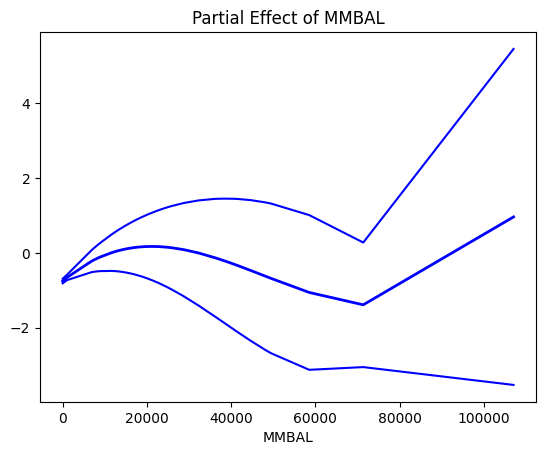

Column: MTGBAL
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                  5457.00
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3540.2
Date:                Tue, 27 Aug 2024   Deviance:                       7080.4
Time:                        15:31:20   Pearson chi2:                 5.46e+03
No. Iterations:                     5   Pseudo R-squ. (CS):           0.001201
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6110      0.029    -

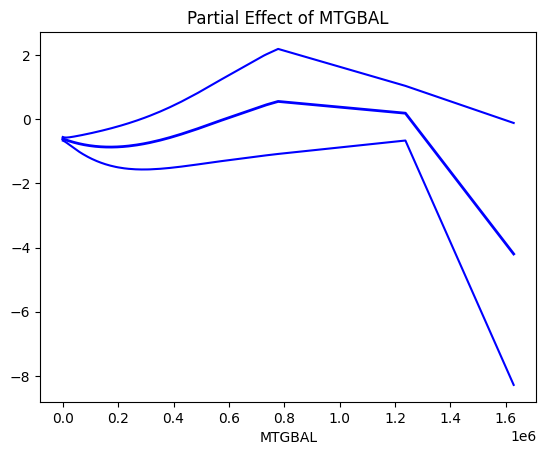

Column: CCBAL
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                  5457.00
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3539.4
Date:                Tue, 27 Aug 2024   Deviance:                       7078.8
Time:                        15:31:20   Pearson chi2:                 5.46e+03
No. Iterations:                     5   Pseudo R-squ. (CS):           0.001484
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6138      0.030    -2

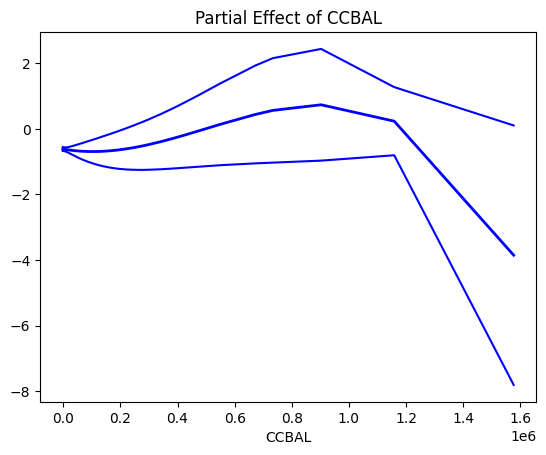

Column: INCOME
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                     5457
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3542.0
Date:                Tue, 27 Aug 2024   Deviance:                       7083.9
Time:                        15:31:20   Pearson chi2:                 5.46e+03
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0005561
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7581      0.096     

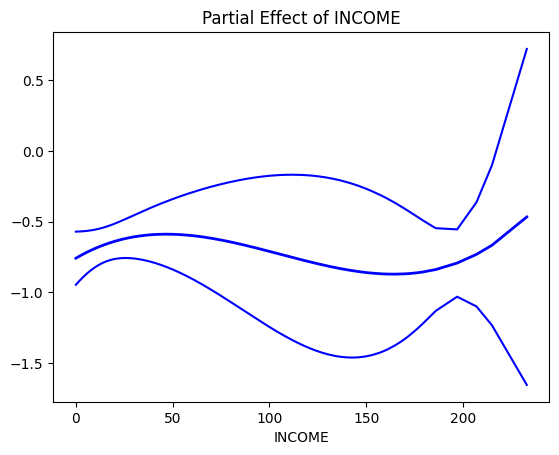

Column: LORES
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                     5457
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3543.3
Date:                Tue, 27 Aug 2024   Deviance:                       7086.6
Time:                        15:31:20   Pearson chi2:                 5.46e+03
No. Iterations:                     5   Pseudo R-squ. (CS):          6.138e-05
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5708      0.209     -

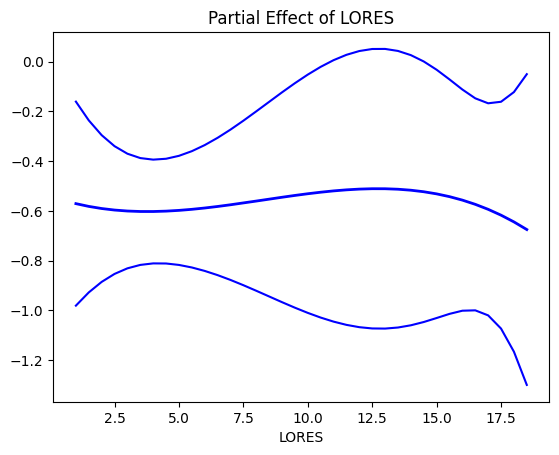

Column: HMVAL
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                  5457.00
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3524.6
Date:                Tue, 27 Aug 2024   Deviance:                       7049.2
Time:                        15:31:20   Pearson chi2:                 5.46e+03
No. Iterations:                    10   Pseudo R-squ. (CS):           0.006882
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2698      2.240     -

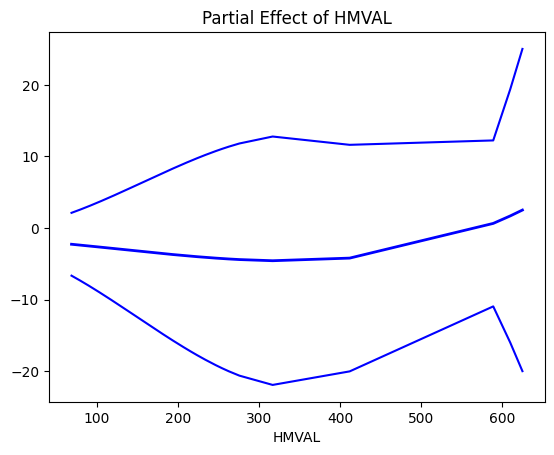

Column: AGE
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                     5457
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3542.2
Date:                Tue, 27 Aug 2024   Deviance:                       7084.4
Time:                        15:31:21   Pearson chi2:                 5.46e+03
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0004591
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5948      0.235     -2.

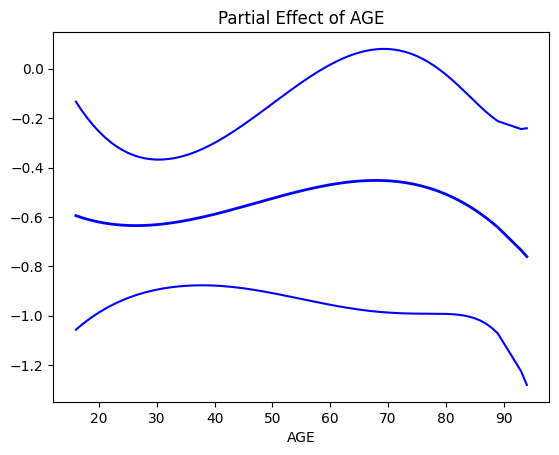

Column: CRSCORE
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    INS   No. Observations:                 5461
Model:                         GLMGam   Df Residuals:                  5457.00
Model Family:                Binomial   Df Model:                         3.00
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -3539.8
Date:                Tue, 27 Aug 2024   Deviance:                       7079.5
Time:                        15:31:21   Pearson chi2:                 5.46e+03
No. Iterations:                     5   Pseudo R-squ. (CS):           0.001362
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0034      0.688    

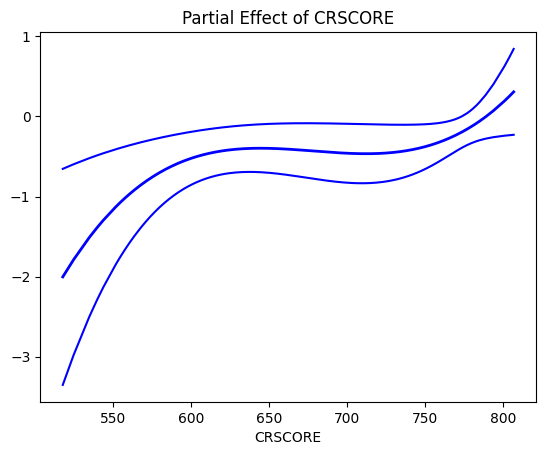

In [43]:
# Iterate over each numeric column
for col in continuous:
    # Define B-splines for the current predictor column
    x_spline = df_no_nulls[[col]]  # Use DataFrame with single column
    bs = BSplines(x_spline, df=[4], degree=[3])  # Adjust df and degree as needed

    # Fit the GAM model
    gam_model = GLMGam.from_formula(f'INS ~ {col}', data=df_no_nulls, smoother=bs, family=sm.families.Binomial()).fit()

    # Print column name
    print(f'Column: {col}')

    # Print model summary
    print(gam_model.summary())

    # Plot the partial effect
    gam_model.plot_partial(smooth_index=0)
    plt.title(f'Partial Effect of {col}')
    plt.show()

In [44]:
# 1 significance table, 1 with binary, 1 with odds ratio
#VIF